In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [2]:
def plotAudio3(sig,sr,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
def plotAudioFreqDomain(sig,sr,title,winSize,specType):
    # create a normalized spectrogram with a small window size (256)
    spec2 = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)

    # plot the second spectogram with a linear frequency scaling
    librosa.display.specshow(spec2, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [4]:
def AdditiveSynthesis(sr,frequency,lowestHarm,highestHarm,seqHarm):
    
    # all the harmonics are the same amplitude so the 
    
    # generate list of harmonics
    harmonics = np.arange(lowestHarm,highestHarm,seqHarm)
    
    # create a time series from 0 to 1 the inputted length    
    timeSeries = np.linspace(0, 1, sr)
    
    # create a cosine wave for the fundamental    
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = (signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries))/2

    return signal

In [12]:
def makeWaveform(frequency,sr,numHarmonics,waveType):
    print (waveType)
    if waveType == 'sawtooth':
        lowestHarm = 1
        seqHarm = 1
        ampExponent = 1
    elif waveType == 'square': 
        lowestHarm = 1
        seqHarm = 2
        ampExponent = 1
    elif waveType == 'triangle':
        lowestHarm = 1
        seqHarm = 2
        ampExponent = 2
    else: 
        lowestHarm = 1
        numHarmonics = 1
        seqHarm = 1
        ampExponent = 1

    signal = AdditiveSynthesis(sr,frequency,numHarmonics,seqHarm,ampExponent)
    return signal

In [13]:
def visualizeWaveform(frequency,sr,numHarmonics,waveType,winSize,specType):
    sig = makeWaveform(frequency,sr,numHarmonics,waveType)
    plotAudio3(sig,sr,waveType)
    plotAudioFreqDomain(sig,sr,waveType,winSize,specType)
    return sig

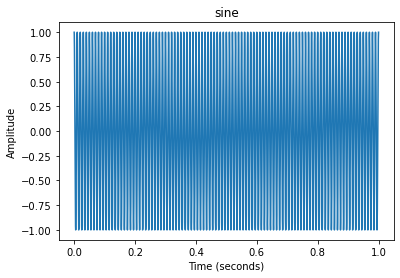

/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


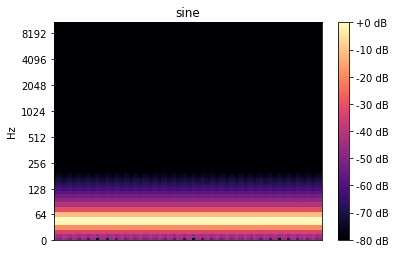

In [7]:
frequency = 100
sr = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'

sig2 = visualizeWaveform(frequency,sr,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=sig2, rate=sr)

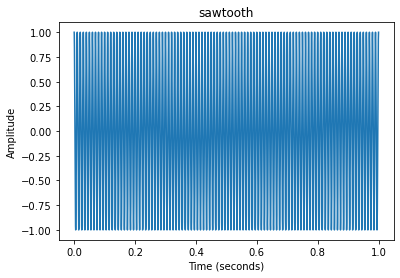

/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


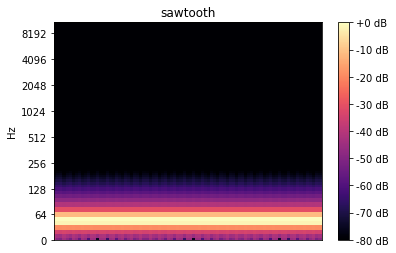

In [8]:
frequency = 100
sr = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'

sig2 = visualizeWaveform(frequency,sr,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=sig2, rate=sr)

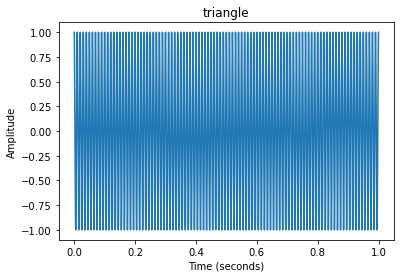

/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


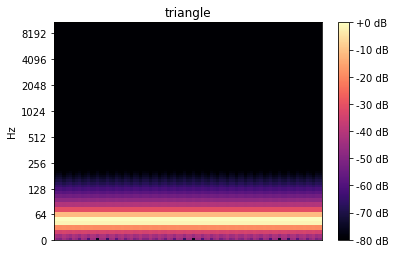

In [9]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'triangle'
winSize = 1024
specType = 'log'

sig2 = visualizeWaveform(frequency,sr,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=sig2, rate=sr)

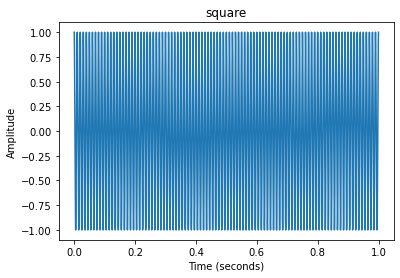

/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


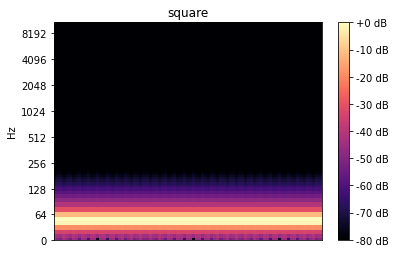

In [10]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'square'
winSize = 1024
specType = 'log'

sig2 = visualizeWaveform(frequency,sr,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=sig2, rate=sr)